In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [20]:
def uniqueAndSumFeatureGraph(savePath, initSystem, paths, labels, colors, time, xlimit, ylimit):
    fig = plt.figure(figsize=(22, 11))
    ax = fig.add_subplot(1, 1, 1)

    for path, label, color in zip(paths, labels, colors):
        
        path = os.path.join(path, "numFeatures.csv")
        print(path)
        df = pd.read_csv(path)
        temp = df[' numFeatPerRepo'].str.split(';', expand = True)
        for (columnName, columnData) in temp.iteritems():
            df[columnName] = pd.to_numeric(temp[columnName])
        df['sumFeatures'] = df.drop('iteration', axis=1).drop(' absoluteFeatureCount', axis=1).drop(' numFeatPerRepo', axis=1).sum(axis=1)
        print(df)
        ax.plot(df['iteration'], df[' absoluteFeatureCount'], label=label, color=color)
        ax.plot(df['iteration'], df['sumFeatures'], ls='--', color=color)
        
        #path = os.path.join(path, "numFeatures.csv")
        #print(path)
        #df = pd.read_csv(path)
        #temp = df[' numFeatPerRepo'].str.split(';', expand = True)
        #perRepo = pd.DataFrame(df['iteration'])
        #for (columnName, columnData) in temp.iteritems():
        #    perRepo[columnName] = pd.to_numeric(temp[columnName])
        #perRepo['sumFeatures'] = perRepo.drop('iteration', axis=1).sum(axis=1)
        #print(perRepo)
        ##df.assign(sumFeatures = df[' numFeatPerRepo'].str.split(';').astype(int))
        ##ax.plot([1,2,3,4,5], [6,7,8,9,10], label=label)
        #ax.plot(df['iteration'], df[' absoluteFeatureCount'], label=label)
        ##ax.plot(df['iteration'], df[' numFeatPerRepo'], label=label, ls='-')

    plt.setp(ax.get_xticklabels(),fontsize=30)
    plt.setp(ax.get_yticklabels(),fontsize=30)
        
    ax.set_xlim(0,xlimit)
    ax.set_ylim(0,ylimit)
    ax.set_xlabel("Iteration", fontsize=50)
    ax.set_ylabel("Number of features", fontsize=50)

    leg1 = ax.legend(fontsize=40, loc='upper left',title='Probability Distribution',title_fontsize='42')
    
    distF, = ax.plot([],[],color='grey',label='Distinct Features')
    sumF, = ax.plot([],[],color='grey',ls='--', label='Non-distinct Features')
    
    leg2 = ax.legend(fontsize=40, handles=[distF,sumF], loc='upper right')
    
    ax.add_artist(leg1)
    
    #ax.set_title(title, fontsize=28)
    fileNumFeatures = savePath + '\\numberOfFeatures_{}_{}_{}.pdf'.format(time, initSystem, xlimit)
    fig.savefig(fileNumFeatures)


In [21]:
def locGraphOverEntireSystem(savePath, initSystem, paths, labels, colors, time, xlimit, ylimitBot, ylimitTop):
    fig = plt.figure(figsize=(22,11))
    ax = fig.add_subplot(1, 1, 1)

    for path, label, color in zip(paths, labels, colors):
        path = os.path.join(path, "loc.csv")
        df = pd.read_csv(path)#.sort_values(by=['iteration'])
        temp = df['iterationRepo'].str.split('-', expand = True)
        df['iteration'] = pd.to_numeric(temp[0])
        df['repo'] = temp[1]
        df = df.sort_values(by=['iteration'])
        print(df.to_string())
        itPerRepoLOC = pd.DataFrame(df['iteration'])
        print(itPerRepoLOC)
        itPerRepoLOC['loc'] = df['loc']#.groupby(['iteration']).sum()
        print(itPerRepoLOC)
        entireSystemLOC = itPerRepoLOC.groupby(['iteration']).sum()
        print(entireSystemLOC.to_string())
        
        ax.plot(entireSystemLOC['loc'], label=label, color=color)

    plt.setp(ax.get_xticklabels(),fontsize=30)
    plt.setp(ax.get_yticklabels(),fontsize=30)
        
    ax.set_xlim(0,xlimit)
    ax.set_ylim(ylimitBot,ylimitTop)
    ax.set_xlabel("Iteration", fontsize=50)
    ax.set_ylabel("LOC", fontsize=50)

    ax.legend(fontsize=40,title='Probability Distribution',title_fontsize='42')

    #ax.set_title(title, fontsize=28)
    fileNumFeatures = savePath + '\\loc_{}_{}_{}.pdf'.format(time, initSystem, xlimit)
    fig.savefig(fileNumFeatures)


In [22]:
def locGraphOverInitialRepo(savePath, initSystem, paths, labels, colors, time, xlimit, ylimitBot, ylimitTop, repoName):
    fig = plt.figure(figsize=(22, 11))
    ax = fig.add_subplot(1, 1, 1)

    for path, label, color in zip(paths, labels, colors):
        path = os.path.join(path, "loc.csv")
        df = pd.read_csv(path)#.sort_values(by=['iteration'])
        temp = df['iterationRepo'].str.split('-', n=1, expand = True)
        df['iteration'] = pd.to_numeric(temp[0])
        df['repo'] = temp[1]
        df = df.sort_values(by=['iteration'])
        print(df.to_string())
        is_initial_repo = df['repo'] == repoName
        initialRepoLOC = df[is_initial_repo]
        print(initialRepoLOC.to_string())
        
        ax.plot(initialRepoLOC['iteration'], initialRepoLOC['loc'], label=label, color=color)

    plt.setp(ax.get_xticklabels(),fontsize=30)
    plt.setp(ax.get_yticklabels(),fontsize=30)
        
    ax.set_xlim(0,xlimit)
    ax.set_ylim(ylimitBot,ylimitTop)
    ax.set_xlabel("Iteration", fontsize=50)
    ax.set_ylabel("LOC", fontsize=50)

    ax.legend(fontsize=40,title='Probability Distribution',title_fontsize='42')

    #ax.set_title(title, fontsize=28)
    fileNumFeatures = savePath + '\\locInitRepo_{}_{}_{}.pdf'.format(time, initSystem, xlimit)
    fig.savefig(fileNumFeatures)


D:\Dokumente\Promotion\vpbench\evaluation\2023-02-24_04-37\numIt_500_CalculatorRoot_1\numFeatures.csv
     iteration   absoluteFeatureCount         numFeatPerRepo   0     1     2  \
0            0                      0                      0   0   NaN   NaN   
1            1                      1                      1   1   NaN   NaN   
2            2                      0                      0   0   NaN   NaN   
3            3                      0                      0   0   NaN   NaN   
4            4                      0                      0   0   NaN   NaN   
..         ...                    ...                    ...  ..   ...   ...   
496        496                     90   17;16;13;15;16;19;16  17  16.0  13.0   
497        497                     91   18;16;13;15;16;19;16  18  16.0  13.0   
498        498                     92   18;16;14;15;16;19;16  18  16.0  14.0   
499        499                     92   18;16;14;15;16;19;16  18  16.0  14.0   
500        500    

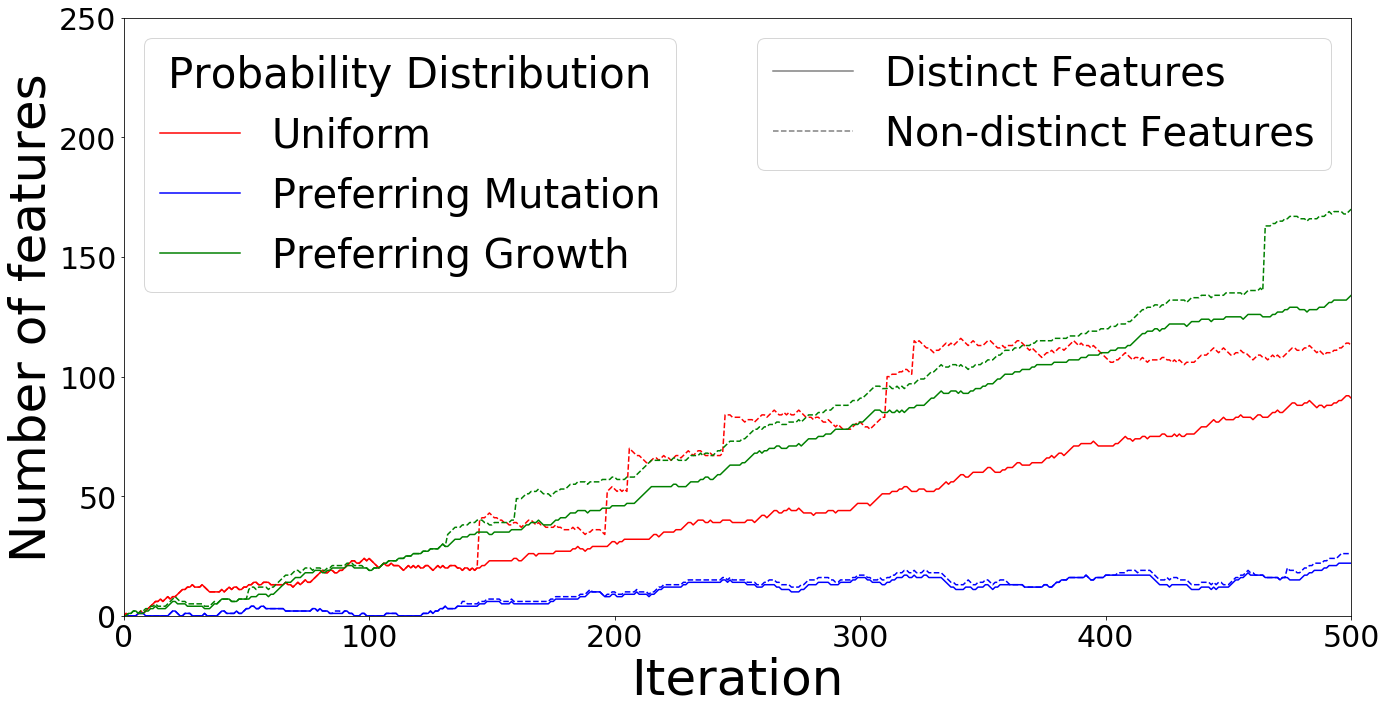

In [23]:
savePath = "D:\\Dokumente\\Promotion\\vpbench\\repo\\2021-vpbenchmark\\visualisation\\generated_figures"
time = '2023-02-24-04-37'
initSystem = "CalculatorRoot"
paths = ["D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_CalculatorRoot_1", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_CalculatorRoot_2", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_CalculatorRoot_3"]
labels = ["Uniform", "Preferring Mutation", "Preferring Growth"]
colors = ['r','b','g']
xlimit = 500
ylimit = 250

uniqueAndSumFeatureGraph(savePath, initSystem, paths, labels, colors, time, xlimit, ylimit)

D:\Dokumente\Promotion\vpbench\evaluation\2023-02-24_04-37\numIt_500_JSON-javaRoot_1\numFeatures.csv
     iteration   absoluteFeatureCount  numFeatPerRepo  0    1     2    3  \
0            0                      0               0  0  NaN   NaN  NaN   
1            1                      0               0  0  NaN   NaN  NaN   
2            2                      0               0  0  NaN   NaN  NaN   
3            3                      0               0  0  NaN   NaN  NaN   
4            4                      0               0  0  NaN   NaN  NaN   
..         ...                    ...             ... ..  ...   ...  ...   
496        496                     29        7;6;11;6  7  6.0  11.0  6.0   
497        497                     29        7;6;11;6  7  6.0  11.0  6.0   
498        498                     29        7;6;11;6  7  6.0  11.0  6.0   
499        499                     29        7;6;11;6  7  6.0  11.0  6.0   
500        500                     28        7;6;11;5  7  6.0  

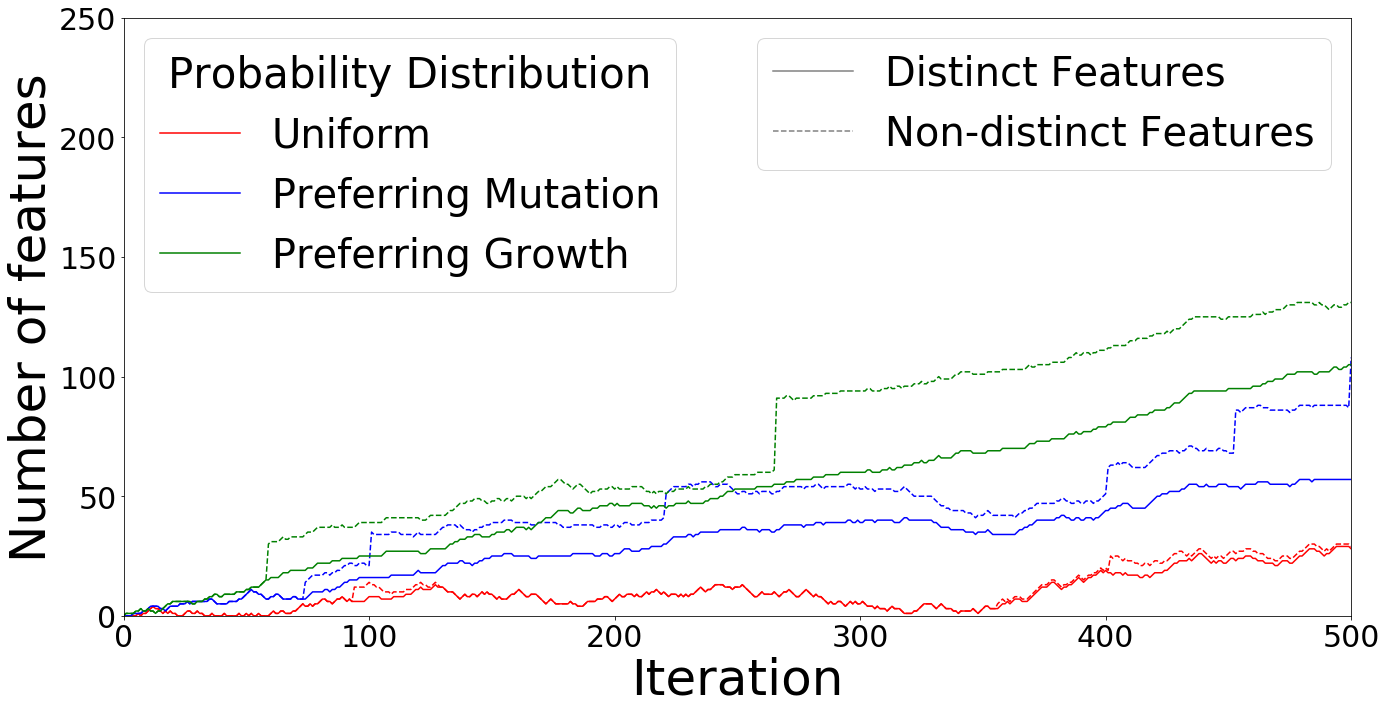

In [24]:
savePath = "D:\\Dokumente\\Promotion\\vpbench\\repo\\2021-vpbenchmark\\visualisation\\generated_figures"
time = '2023-02-24-04-37'
initSystem = "JSON-javaRoot"
paths = ["D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_JSON-javaRoot_1", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_JSON-javaRoot_2", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_JSON-javaRoot_3"]
labels = ["Uniform", "Preferring Mutation", "Preferring Growth"]
colors = ['r','b','g']
xlimit = 500
ylimit = 250

uniqueAndSumFeatureGraph(savePath, initSystem, paths, labels, colors, time, xlimit, ylimit)

                 iterationRepo   loc  iteration                  repo
0             0-CalculatorRepo    62          0        CalculatorRepo
1             1-CalculatorRepo   158          1        CalculatorRepo
170           2-CalculatorRepo    62          2        CalculatorRepo
630           3-CalculatorRepo    62          3        CalculatorRepo
1308          4-CalculatorRepo    62          4        CalculatorRepo
2019          5-CalculatorRepo    62          5        CalculatorRepo
2037          6-CalculatorRepo  6557          6        CalculatorRepo
2048          7-CalculatorRepo  6564          7        CalculatorRepo
2059          8-CalculatorRepo    75          8        CalculatorRepo
2070          9-CalculatorRepo   204          9        CalculatorRepo
2            10-CalculatorRepo   394         10        CalculatorRepo
13           11-CalculatorRepo   434         11        CalculatorRepo
24           12-CalculatorRepo  6914         12        CalculatorRepo
35           13-Calc

2031      500-CalculatorRepo  9443        500      CalculatorRepo
      iteration
0             0
1             1
430           2
951           3
1472          4
...         ...
2034        500
2035        500
2036        500
2032        500
2031        500

[2191 rows x 1 columns]
      iteration   loc
0             0    62
1             1    62
430           2   318
951           3   318
1472          4   441
...         ...   ...
2034        500  9011
2035        500  9421
2036        500  9212
2032        500  9622
2031        500  9443

[2191 rows x 2 columns]
             loc
iteration       
0             62
1             62
2            318
3            318
4            441
5            441
6            318
7            636
8            636
9            685
10           684
11           884
12           883
13          1241
14          1041
15          1041
16          1042
17          1042
18          1053
19          1234
20          1255
21          1276
22          1265
23 

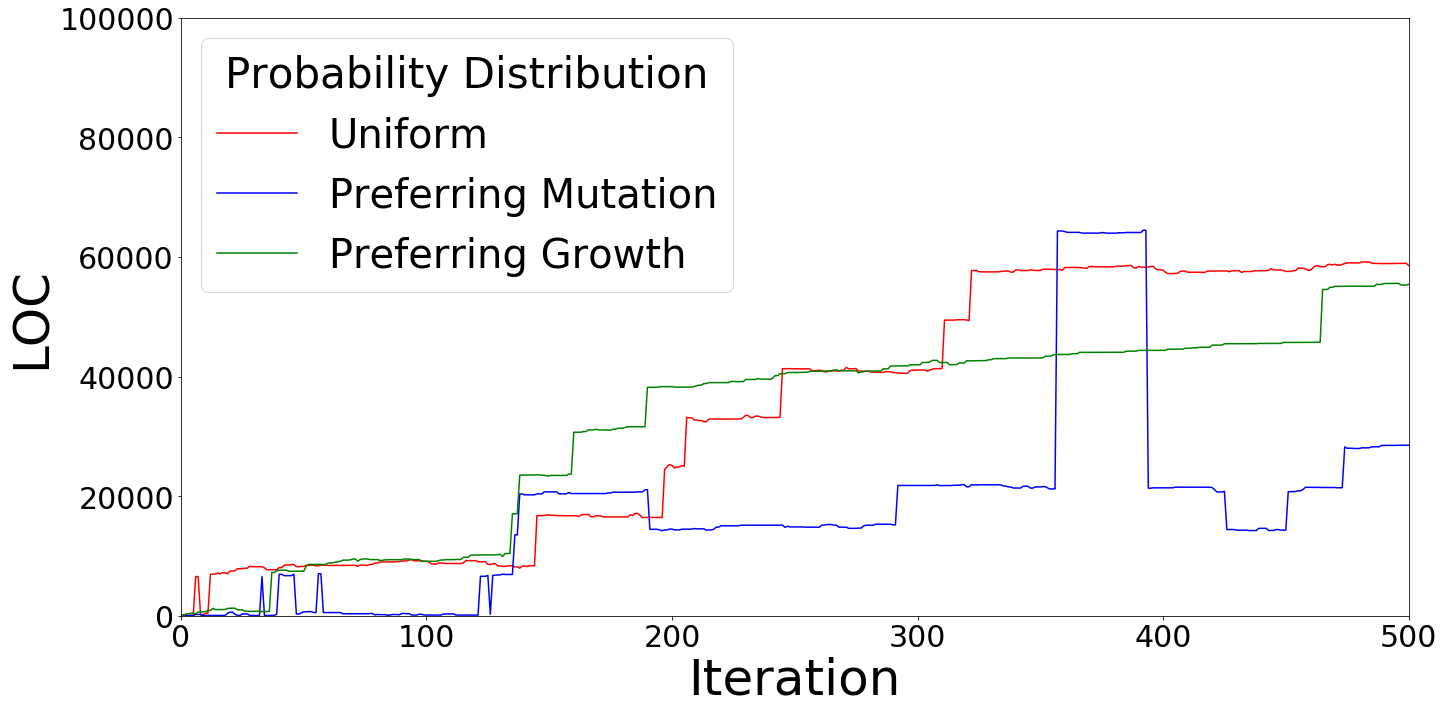

In [25]:
savePath = "D:\\Dokumente\\Promotion\\vpbench\\repo\\2021-vpbenchmark\\visualisation\\generated_figures"
time = '2023-02-24-04-37'
initSystem = "CalculatorRoot"
paths = ["D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_CalculatorRoot_1", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_CalculatorRoot_2", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_CalculatorRoot_3"]
labels = ["Uniform", "Preferring Mutation", "Preferring Growth"]
colors = ['r','b','g']
xlimit = 500
ylimitBot = 0
ylimitTop = 100000

locGraphOverEntireSystem(savePath, initSystem, paths, labels, colors, time, xlimit, ylimitBot, ylimitTop)

        iterationRepo    loc  iteration  repo
0         0-JSON-java  11837          0  JSON
1         1-JSON-java  11837          1  JSON
212       2-JSON-java  11837          2  JSON
423       3-JSON-java  11837          3  JSON
678       4-JSON-java  11837          4  JSON
1087      5-JSON-java  11837          5  JSON
1102      6-JSON-java  11943          6  JSON
1113      7-JSON-java  11837          7  JSON
1124      8-JSON-java  12154          8  JSON
1135      9-JSON-java  12153          9  JSON
2        10-JSON-java  12238         10  JSON
23       11-JSON-java  12431         11  JSON
44       12-JSON-java  12616         12  JSON
65       13-JSON-java  12299         13  JSON
86       14-JSON-java  12223         14  JSON
107      15-JSON-java  12038         15  JSON
128      16-JSON-java  11845         16  JSON
149      17-JSON-java  12224         17  JSON
170      18-JSON-java  12139         18  JSON
191      19-JSON-java  12235         19  JSON
213      20-JSON-java  11856      

[1178 rows x 1 columns]
      iteration    loc
0             0  11837
1             1  18325
212           2  18324
457           3  18323
768           4  18323
...         ...    ...
1077        499  21772
1078        499  21643
1081        500  22306
1082        500  21772
1083        500  21644

[1178 rows x 2 columns]
             loc
iteration       
0          11837
1          18325
2          18324
3          18323
4          18323
5          18374
6          18375
7          18518
8          18375
9          18375
10         18424
11         18373
12         18372
13         18323
14         18391
15         18391
16         18619
17         18734
18         18746
19         18731
20         18837
21         18837
22         18829
23         18830
24         18829
25         18829
26         18828
27         18828
28         18815
29         18816
30         18826
31         18826
32         18826
33         18839
34         18839
35         18868
36         18868
37         1

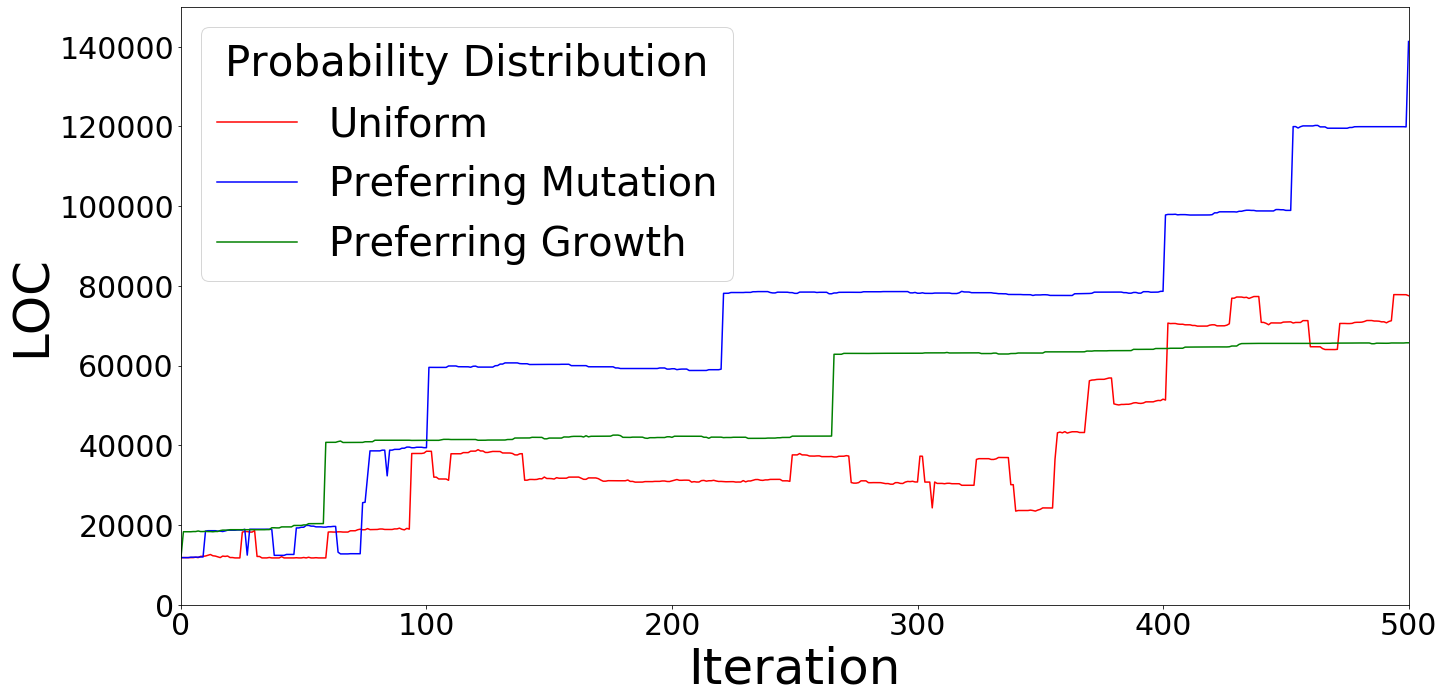

In [26]:
savePath = "D:\\Dokumente\\Promotion\\vpbench\\repo\\2021-vpbenchmark\\visualisation\\generated_figures"
time = '2023-02-24-04-37'
initSystem = "JSON-javaRoot"
paths = ["D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_JSON-javaRoot_1", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_JSON-javaRoot_2", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_JSON-javaRoot_3"]
labels = ["Uniform", "Preferring Mutation", "Preferring Growth"]
colors = ['r','b','g']
xlimit = 500
ylimitBot = 0
ylimitTop = 150000

locGraphOverEntireSystem(savePath, initSystem, paths, labels, colors, time, xlimit, ylimitBot, ylimitTop)

                 iterationRepo   loc  iteration                  repo
0             0-CalculatorRepo    62          0        CalculatorRepo
1             1-CalculatorRepo   158          1        CalculatorRepo
170           2-CalculatorRepo    62          2        CalculatorRepo
630           3-CalculatorRepo    62          3        CalculatorRepo
1308          4-CalculatorRepo    62          4        CalculatorRepo
2019          5-CalculatorRepo    62          5        CalculatorRepo
2037          6-CalculatorRepo  6557          6        CalculatorRepo
2048          7-CalculatorRepo  6564          7        CalculatorRepo
2059          8-CalculatorRepo    75          8        CalculatorRepo
2070          9-CalculatorRepo   204          9        CalculatorRepo
2            10-CalculatorRepo   394         10        CalculatorRepo
13           11-CalculatorRepo   434         11        CalculatorRepo
24           12-CalculatorRepo  6914         12        CalculatorRepo
35           13-Calc

               iterationRepo   loc  iteration                repo
0           0-CalculatorRepo    62          0      CalculatorRepo
1           1-CalculatorRepo    62          1      CalculatorRepo
430         2-CalculatorRepo   318          2      CalculatorRepo
951         3-CalculatorRepo   318          3      CalculatorRepo
1472        4-CalculatorRepo   441          4      CalculatorRepo
2028        5-CalculatorRepo   441          5      CalculatorRepo
2064        6-CalculatorRepo   318          6      CalculatorRepo
2096      7-CalculatorRepo_0   318          7    CalculatorRepo_0
2095        7-CalculatorRepo   318          7      CalculatorRepo
2128      8-CalculatorRepo_0   318          8    CalculatorRepo_0
2127        8-CalculatorRepo   318          8      CalculatorRepo
2159        9-CalculatorRepo   318          9      CalculatorRepo
2160      9-CalculatorRepo_0   367          9    CalculatorRepo_0
3        10-CalculatorRepo_0   367         10    CalculatorRepo_0
2         

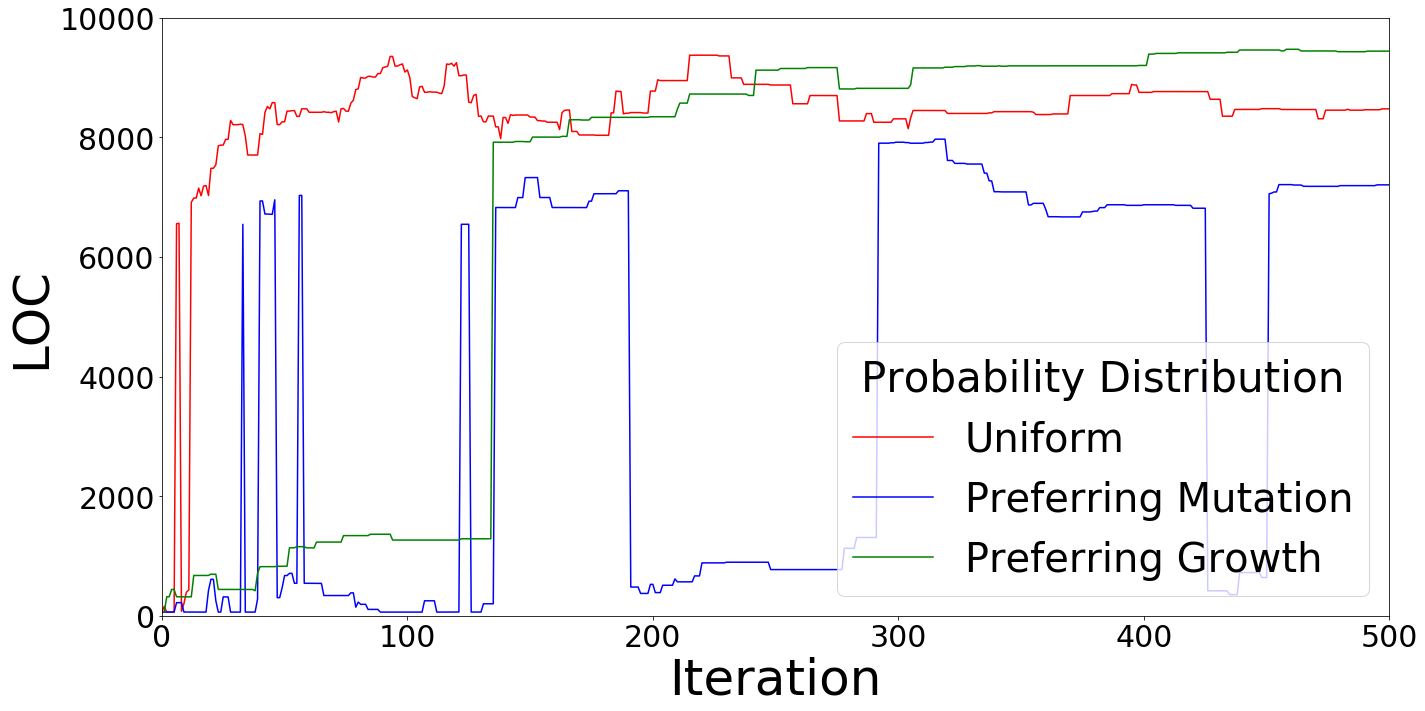

In [27]:
savePath = "D:\\Dokumente\\Promotion\\vpbench\\repo\\2021-vpbenchmark\\visualisation\\generated_figures"
time = '2023-02-24-04-37'
initSystem = "CalculatorRoot"
paths = ["D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_CalculatorRoot_1", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_CalculatorRoot_2", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_CalculatorRoot_3"]
labels = ["Uniform", "Preferring Mutation", "Preferring Growth"]
colors = ['r','b','g']
xlimit = 500
ylimitBot = 0
ylimitTop = 10000

locGraphOverInitialRepo(savePath, initSystem, paths, labels, colors, time, xlimit, ylimitBot, ylimitTop, "CalculatorRepo")

        iterationRepo    loc  iteration         repo
0         0-JSON-java  11837          0    JSON-java
1         1-JSON-java  11837          1    JSON-java
212       2-JSON-java  11837          2    JSON-java
423       3-JSON-java  11837          3    JSON-java
678       4-JSON-java  11837          4    JSON-java
1087      5-JSON-java  11837          5    JSON-java
1102      6-JSON-java  11943          6    JSON-java
1113      7-JSON-java  11837          7    JSON-java
1124      8-JSON-java  12154          8    JSON-java
1135      9-JSON-java  12153          9    JSON-java
2        10-JSON-java  12238         10    JSON-java
23       11-JSON-java  12431         11    JSON-java
44       12-JSON-java  12616         12    JSON-java
65       13-JSON-java  12299         13    JSON-java
86       14-JSON-java  12223         14    JSON-java
107      15-JSON-java  12038         15    JSON-java
128      16-JSON-java  11845         16    JSON-java
149      17-JSON-java  12224         17    JSO

1083  500-JSON-java_0_1  21644        500  JSON-java_0_1
      iterationRepo    loc  iteration       repo
0       0-JSON-java  11837          0  JSON-java
1       1-JSON-java  18325          1  JSON-java
212     2-JSON-java  18324          2  JSON-java
457     3-JSON-java  18323          3  JSON-java
768     4-JSON-java  18323          4  JSON-java
1079    5-JSON-java  18374          5  JSON-java
1094    6-JSON-java  18375          6  JSON-java
1115    7-JSON-java  18518          7  JSON-java
1136    8-JSON-java  18375          8  JSON-java
1157    9-JSON-java  18375          9  JSON-java
2      10-JSON-java  18424         10  JSON-java
23     11-JSON-java  18373         11  JSON-java
44     12-JSON-java  18372         12  JSON-java
65     13-JSON-java  18323         13  JSON-java
86     14-JSON-java  18391         14  JSON-java
107    15-JSON-java  18391         15  JSON-java
128    16-JSON-java  18619         16  JSON-java
149    17-JSON-java  18734         17  JSON-java
170    18-JS

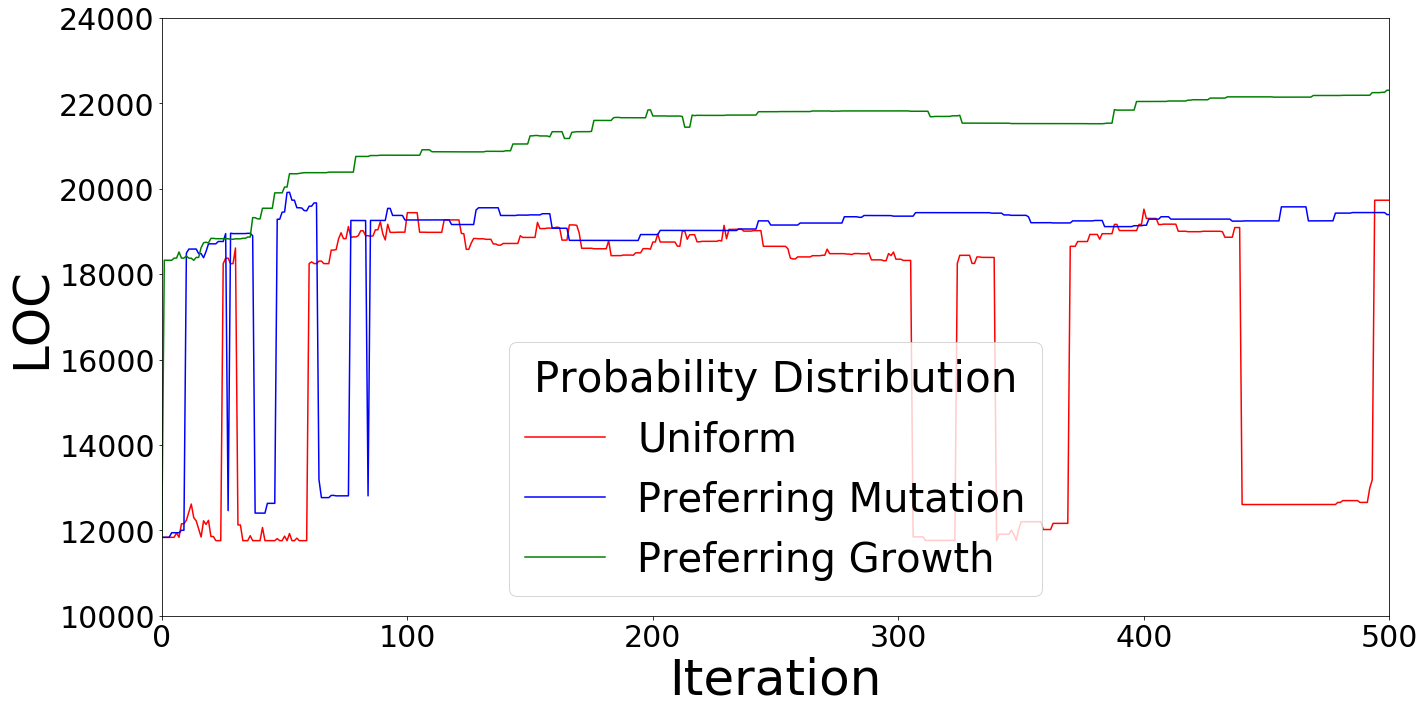

In [28]:
savePath = "D:\\Dokumente\\Promotion\\vpbench\\repo\\2021-vpbenchmark\\visualisation\\generated_figures"
time = '2023-02-24-04-37'
initSystem = "JSON-javaRoot"
paths = ["D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_JSON-javaRoot_1", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_JSON-javaRoot_2", "D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-24_04-37\\numIt_500_JSON-javaRoot_3"]
labels = ["Uniform", "Preferring Mutation", "Preferring Growth"]
colors = ['r','b','g']
xlimit = 500
ylimitBot = 10000
ylimitTop = 24000

locGraphOverInitialRepo(savePath, initSystem, paths, labels, colors, time, xlimit, ylimitBot, ylimitTop, "JSON-java")

D:\Dokumente\Promotion\vpbench\evaluation\2023-02-26_05-36\numIt_500_RxJava-Root_3\numFeatures.csv
     iteration   absoluteFeatureCount   numFeatPerRepo   0     1     2     3  \
0            0                      0                0   0   NaN   NaN   NaN   
1            1                      0                0   0   NaN   NaN   NaN   
2            2                      0                0   0   NaN   NaN   NaN   
3            3                      0                0   0   NaN   NaN   NaN   
4            4                      1                1   1   NaN   NaN   NaN   
..         ...                    ...              ...  ..   ...   ...   ...   
496        496                     61   37;40;43;43;37  37  40.0  43.0  43.0   
497        497                     61   37;40;43;43;37  37  40.0  43.0  43.0   
498        498                     61   37;40;43;43;37  37  40.0  43.0  43.0   
499        499                     61   37;40;43;43;37  37  40.0  43.0  43.0   
500        500       

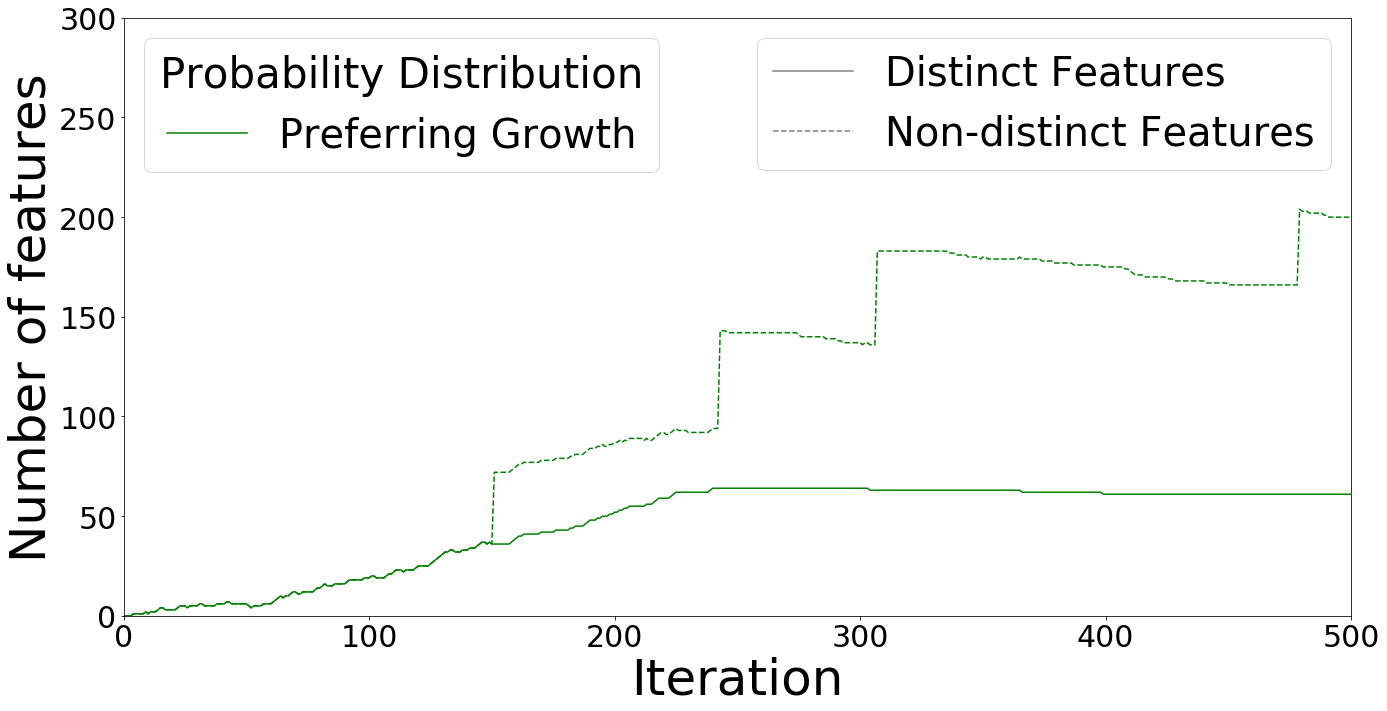

In [29]:
savePath = "D:\\Dokumente\\Promotion\\vpbench\\repo\\2021-vpbenchmark\\visualisation\\generated_figures"
time = '2023-02-26-05-36'
initSystem = "RxJava-Root"
paths = ["D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-26_05-36\\numIt_500_RxJava-Root_3"]
labels = ["Preferring Growth"]
colors = ['g']
xlimit = 500
ylimit = 300

uniqueAndSumFeatureGraph(savePath, initSystem, paths, labels, colors, time, xlimit, ylimit)

         iterationRepo     loc  iteration          repo
0             0-RxJava  311970          0        RxJava
1             1-RxJava  311970          1        RxJava
161           2-RxJava  311970          2        RxJava
429           3-RxJava  311970          3        RxJava
833           4-RxJava  318457          4        RxJava
1265          5-RxJava  318458          5        RxJava
1281          6-RxJava  318459          6        RxJava
1292          7-RxJava  318458          7        RxJava
1303          8-RxJava  318458          8        RxJava
1314          9-RxJava  318581          9        RxJava
2            10-RxJava  312094         10        RxJava
13           11-RxJava  312142         11        RxJava
24           12-RxJava  312141         12        RxJava
35           13-RxJava  312142         13        RxJava
46           14-RxJava  312153         14        RxJava
57           15-RxJava  318638         15        RxJava
77           16-RxJava  318639         16       

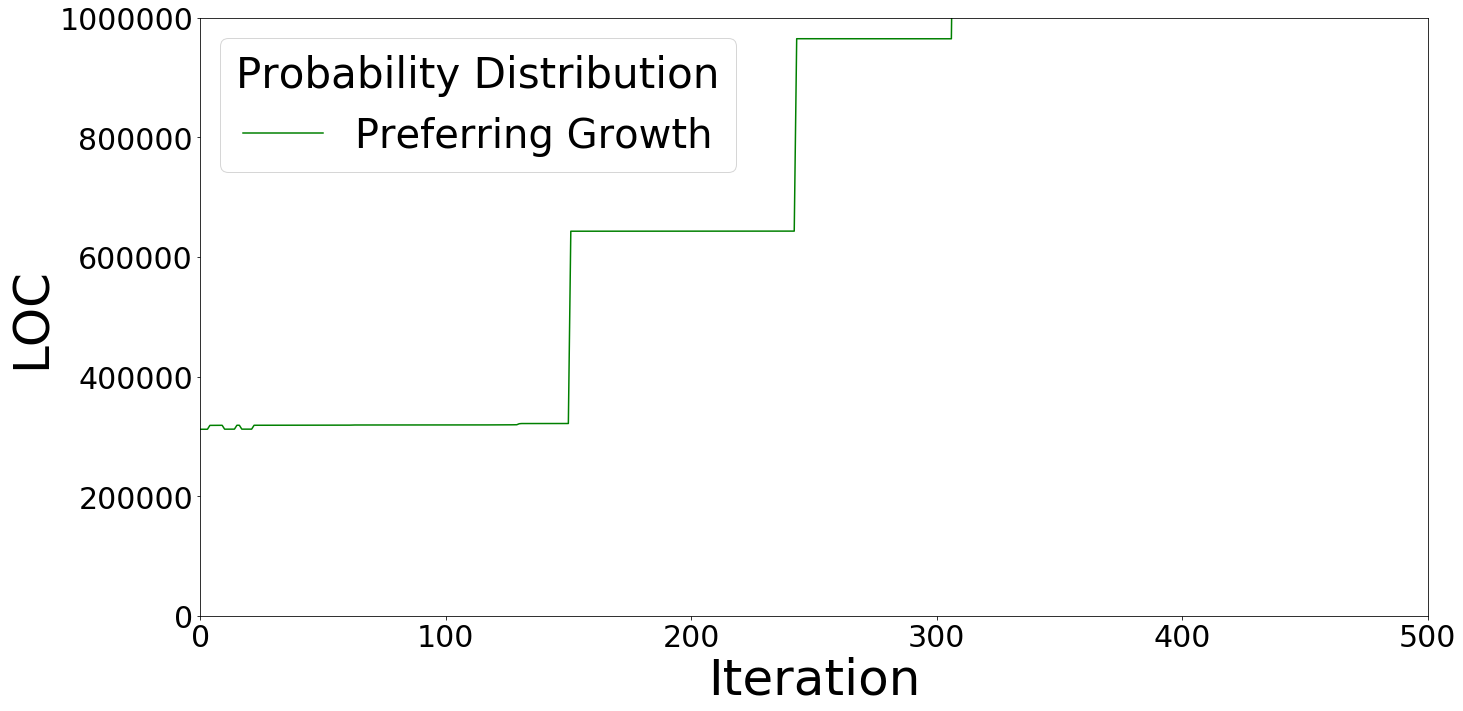

In [30]:
savePath = "D:\\Dokumente\\Promotion\\vpbench\\repo\\2021-vpbenchmark\\visualisation\\generated_figures"
time = '2023-02-26-05-36'
initSystem = "RxJava-Root"
paths = ["D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-26_05-36\\numIt_500_RxJava-Root_3"]
labels = ["Preferring Growth"]
colors = ['g']
xlimit = 500
ylimitBot = 0
ylimitTop = 1000000

locGraphOverEntireSystem(savePath, initSystem, paths, labels, colors, time, xlimit, ylimitBot, ylimitTop)

         iterationRepo     loc  iteration          repo
0             0-RxJava  311970          0        RxJava
1             1-RxJava  311970          1        RxJava
161           2-RxJava  311970          2        RxJava
429           3-RxJava  311970          3        RxJava
833           4-RxJava  318457          4        RxJava
1265          5-RxJava  318458          5        RxJava
1281          6-RxJava  318459          6        RxJava
1292          7-RxJava  318458          7        RxJava
1303          8-RxJava  318458          8        RxJava
1314          9-RxJava  318581          9        RxJava
2            10-RxJava  312094         10        RxJava
13           11-RxJava  312142         11        RxJava
24           12-RxJava  312141         12        RxJava
35           13-RxJava  312142         13        RxJava
46           14-RxJava  312153         14        RxJava
57           15-RxJava  318638         15        RxJava
77           16-RxJava  318639         16       

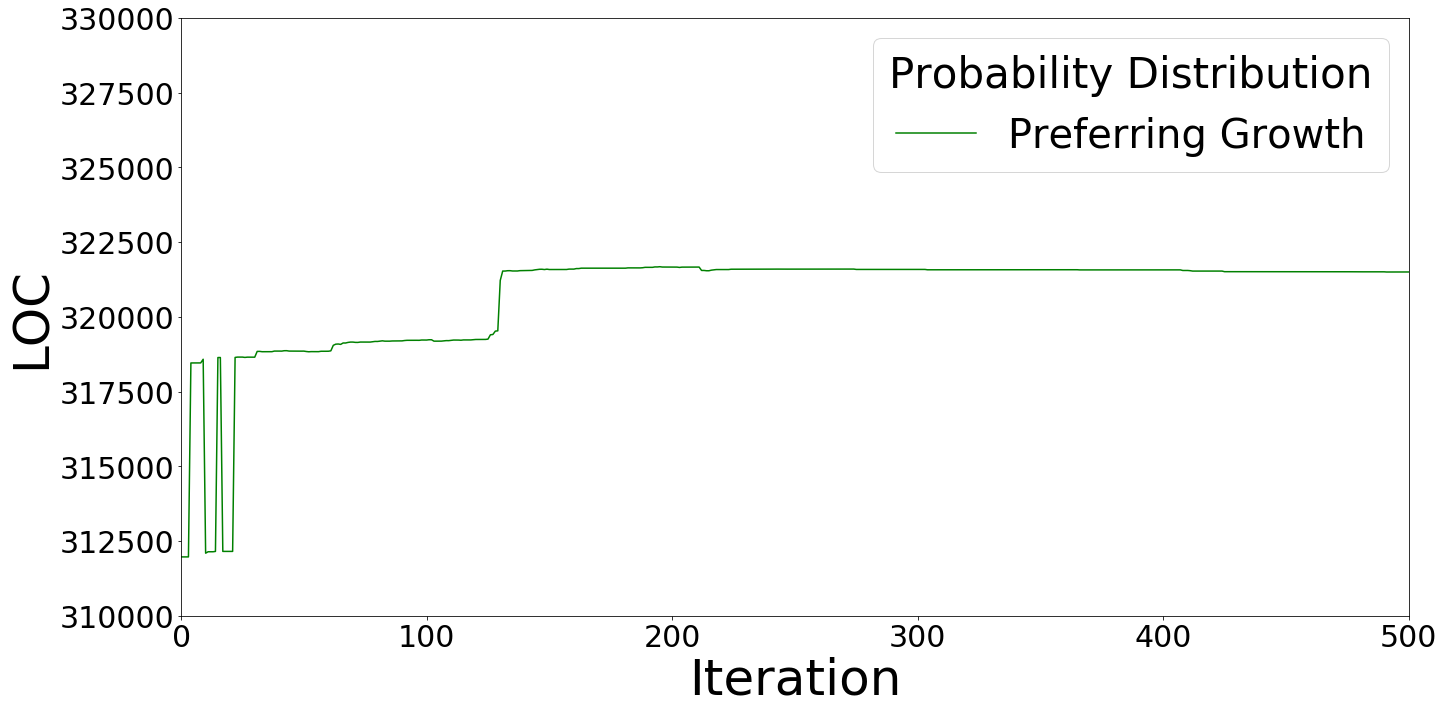

In [34]:
savePath = "D:\\Dokumente\\Promotion\\vpbench\\repo\\2021-vpbenchmark\\visualisation\\generated_figures"
time = '2023-02-26-05-36'
initSystem = "RxJava-Root"
paths = ["D:\\Dokumente\\Promotion\\vpbench\\evaluation\\2023-02-26_05-36\\numIt_500_RxJava-Root_3"]
labels = ["Preferring Growth"]
colors = ['g']
xlimit = 500
ylimitBot = 310000
ylimitTop = 330000

locGraphOverInitialRepo(savePath, initSystem, paths, labels, colors, time, xlimit, ylimitBot, ylimitTop, "RxJava")